## Parte 4 - Laboratorio 3 - Modelación y Simulación

Stefano Aragoni, Carol Arévalo, Luis Santos, Diego Perdomo


-------
## Tasks 1

Suponiendo que es simple generar variables aleatorias con función de probabilidad acumulada Fi(x) para i de 1 a n, tenemos la variable aleatoria V con una función de probabilidad acumulada 

F(x) = Σ p_i * F_i(x),

Donde pi constituye una distribución probabilística
1. Describa un algoritmo para generar V
2. Demuestre que el algoritmo genera adecuadamente V

Para generar la variable aleatoria V con función de probabilidad acumulada F(x) = Σ p_i * F_i(x), podemos utilizar el método de composición. Este método consiste en generar una variable aleatoria U con distribución uniforme en [0,1] y luego aplicar la transformación inversa de F(x) a U. Es decir, se busca x tal que F(x) = U y se define V = x.

Fuente:
https://www.famaf.unc.edu.ar/~kisbye/mys/clase8_pr.pdf

El algoritmo consiste en dos pasos: en el primer paso, generamos una variable aleatoria discreta Y con función de probabilidad acumulada p_i. En el segundo paso, condicionado a Y = i, generamos una variable aleatoria X con función de probabilidad acumulada F_i(x). La variable V será igual a X si Y = i.

Paso a paso:


1. Generar Y:
    a. Generamos un número aleatorio uniforme U en el intervalo (0, 1).
    b. Usamos la función de probabilidad acumulada p_i para determinar el valor de Y. Para hacer esto, comparamos U con los valores de la función acumulada de p_i:

        Si U < p_1, entonces Y = 1.
        Si p_1 ≤ U < p_1 + p_2, entonces Y = 2.
        Y así sucesivamente, hasta n.

En la primera etapa, se genera una variable aleatoria discreta Y utilizando el método de la transformación inversa con la distribución discreta dada por la función de probabilidad acumulada p_i. Aquí es donde se aplica la transformación inversa de F(x) a U (un número aleatorio uniforme en [0, 1]) para obtener Y. La variable U se utiliza para determinar el valor de Y según los rangos definidos por la función acumulada p_i.



2. Generar X condicionado a Y:
    a. Si Y = i (es decir, se seleccionó la distribución i-ésima), generamos un número aleatorio X utilizando la función de probabilidad acumulada F_i(x). Para esto, repetimos el siguiente procedimiento hasta que se obtenga un valor de X válido:
        i. Generamos un número aleatorio V_i en el intervalo (0, 1).
        ii. Resolvemos la ecuación F_i(X) = V_i para obtener el valor de X.

En la segunda etapa, condicionado a Y = i (es decir, se seleccionó la distribución i-ésima en la primera etapa), se genera una variable aleatoria continua X utilizando nuevamente la transformación inversa, pero esta vez con la distribución F_i(x). Se genera un número aleatorio V_i uniforme en el intervalo (0, 1), y se resuelve la ecuación F_i(X) = V_i para obtener el valor de X. Si Y ≠ i, se repite el proceso desde el primer paso para obtener un nuevo valor de Y.

3. V es igual a X si Y = i. Si Y ≠ i, volvemos al paso 1 y repetimos el proceso para obtener un nuevo valor de Y.
_____________________________________________________________________



Para demostrar que el algoritmo propuesto genera adecuadamente la variable aleatoria V con función de probabilidad acumulada F(x) = Σ p_i * F_i(x), debemos se verifican dos cosas:

1. La distribución de la variable aleatoria Y generada en el paso 1 corresponde a la función de probabilidad acumulada p_i.

En el paso 1 del algoritmo, se genera la variable aleatoria discreta Y siguiendo el método de la transformación inversa con la distribución de probabilidad acumulada p_i. Esto significa que la probabilidad de que Y tome el valor i, P(Y = i), es igual a la probabilidad acumulada p_i en ese punto.

Probabilidad de que Y = i:
P(Y = i) = P(U < p_1 + p_2 + ... + p_i) - P(U < p_1 + p_2 + ... + p_{i-1}) = p_i.



2. La distribución condicional de la variable aleatoria X, dado que Y = i, corresponde a la función de probabilidad acumulada F_i(x).
Demostración:

En el paso 2 del algoritmo, condicionado a Y = i, se genera la variable aleatoria continua X utilizando el método de la transformación inversa con la distribución de probabilidad acumulada F_i(x).

Probabilidad de que X ≤ x, dado que Y = i:
P(X ≤ x | Y = i) = P(F_i(X) ≤ F_i(x) | Y = i) (debido a que F_i es una función de probabilidad acumulada)
= P(V_i ≤ F_i(x)) (donde V_i es la variable aleatoria uniforme generada en el paso 2)
= F_i(x).

Hemos demostrado que la distribución condicional de X, dado que Y = i, corresponde a la función de probabilidad acumulada F_i(x).



-------
## Tasks 2

Escriba un programa tal que, dada una función de masa de probabilidad (pi para i de 1 a n), proporcione como salida el valor de una variable aleatoria con esta función de masa. Haga un histograma para alguna distribución de ejemplo.

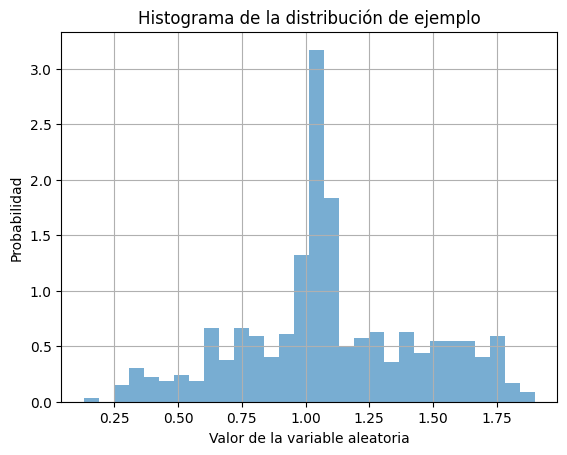

In [1]:
import random
import matplotlib.pyplot as plt

def generate_random_variable(probabilities):
    Y = random.choices(range(1, len(probabilities) + 1), probabilities)[0]
    
    U = random.random()
    
    cumulative_sum = 0
    for i, p in enumerate(probabilities):
        cumulative_sum += p
        if i + 1 == Y:
            inverse_cdf = cumulative_sum
            break

    V = inverse_cdf + (1 - inverse_cdf) * U
    return V

def example_distribution():
    probabilities = [0.1, 0.2, 0.3, 0.5, 0.7, 0.1]
    
    random_variables = [generate_random_variable(probabilities) for _ in range(1000)]
    
    plt.hist(random_variables, bins=30, density=True, alpha=0.6)
    plt.xlabel('Valor de la variable aleatoria')
    plt.ylabel('Probabilidad')
    plt.title('Histograma de la distribución de ejemplo')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    example_distribution()


-------
## Tasks 2

Task 3
Suponga que usted es gerente de proyecto en Inversiones Chileras S.A.; y debe elegir entre dos proyectos a realizar, la construcción de un Hotel o la construcción de de un Centro Comercial.

Si el parámetro que quiere utilizar para comprar ambos proyectos es el Valor Presente Neto al 10% del costo de
capital.
1. Realice tres simulaciones para determinar cuál de los proyectos es el más rentable. Utilice 100, 1,000 y
10,000 iteraciones

In [14]:
import random

def calcular_vpn(flujos_caja, tasa_descuento):
    costo_inicial = flujos_caja[0]
    vpn = -costo_inicial
    for t in range(1, len(flujos_caja)):
        vpn += flujos_caja[t] / (1 + tasa_descuento) ** t
    return vpn

def simulacion_proyecto(proyecto, num_iteraciones, tasa_descuento):
    vpns = []
    for _ in range(num_iteraciones):
        flujos_caja_simulados = [random.choice(dist) if isinstance(dist, list) else dist for dist in proyecto]
        vpn = calcular_vpn(flujos_caja_simulados, tasa_descuento)
        vpns.append(vpn)
    return vpns

proyecto_hotel = [
    -800,
    [random.normalvariate(-800, 50) for _ in range(1, 8)],
    [random.normalvariate(-800, 100) for _ in range(1, 8)],
    [random.normalvariate(-700, 150) for _ in range(1, 8)],
    [random.normalvariate(300, 200) for _ in range(1, 8)],
    [random.normalvariate(400, 200) for _ in range(1, 8)],
    [random.normalvariate(500, 200) for _ in range(1, 8)],
    [random.uniform(200, 8480) for _ in range(1, 8)]
]

proyecto_centro_comercial = [
    -900,
    [random.normalvariate(-600, 50) for _ in range(1, 8)],
    [random.normalvariate(-200, 50) for _ in range(1, 8)],
    [random.normalvariate(-600, 100) for _ in range(1, 8)],
    [random.normalvariate(250, 150) for _ in range(1, 8)],
    [random.normalvariate(350, 150) for _ in range(1, 8)],
    [random.normalvariate(400, 150) for _ in range(1, 8)],
    [random.uniform(1600, 6000) for _ in range(1, 8)]
]

num_iteraciones = [100, 1000, 10000]
for i in num_iteraciones:
    vpns_hotel = simulacion_proyecto(proyecto_hotel, i, 0.10)
    vpns_cc = simulacion_proyecto(proyecto_centro_comercial, i, 0.10)

    vpn_promedio_hotel = sum(vpns_hotel) / len(vpns_hotel)
    vpn_promedio_cc = sum(vpns_cc) / len(vpns_cc)

    print(f"Simulación con {i} iteraciones:")
    print("VPN promedio Hotel:", vpn_promedio_hotel)
    print("VPN promedio Centro Comercial:", vpn_promedio_cc)
    print("Proyecto más rentable:", "Hotel" if vpn_promedio_hotel > vpn_promedio_cc else "Centro Comercial")
    print("--------------------------------------------------")


Simulación con 100 iteraciones:
VPN promedio Hotel: 1695.8503574018926
VPN promedio Centro Comercial: 1985.7725412207585
Proyecto más rentable: Centro Comercial
--------------------------------------------------
Simulación con 1000 iteraciones:
VPN promedio Hotel: 1716.3335599836166
VPN promedio Centro Comercial: 1882.8686782533941
Proyecto más rentable: Centro Comercial
--------------------------------------------------
Simulación con 10000 iteraciones:
VPN promedio Hotel: 1699.1187328653507
VPN promedio Centro Comercial: 1895.6549603264389
Proyecto más rentable: Centro Comercial
--------------------------------------------------
